## Instructions

Training two different Bayesian classifiers to predict whether or not a patient has diabetes, based on certain diagnostic measurements (several medical predictor variables):

. Target Label : **Outcome**

. Predictor Variables (features):

    . Number of Pregnancies the patient has had
    . Glucose
    . BloodPressure
    . SkinThickness
    . Insuline Level
    . BMI  (Body Mass Index)
    . DiabetesPedigreeFunction
    . Age


### 1) Download the data / Splitting Data
Download the diabetes dataset. Split the 768 instances into training and testing sets (8:2)


In [5]:
# Import the libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt


# Disabling warnings from numpy / cython
np.warnings.filterwarnings('ignore')


# Load data into a Dataframe with Pandas
df = pd.read_csv("diabetes.csv")
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [7]:
# checking total number of rows and columns
df.shape

(768, 9)

In [13]:
# displaying the column names
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [17]:
# Alternative way to splitting data for features and targets

# Creating a list with the 'names' of our features based the column headers from df (minus the last column 'outcome')

feature_names = list(df.columns[:8])

# Creating our features from dataframe 'df' using 'feature_names' list
features = df[feature_names]

# Creating our target
targets = df['Outcome']

# Split the 768 instances into training and testing sets (8:2)
# Creating a size for the training set that is 80% of the total number of samples
train_size = int(0.80 * features.shape[0])

# Training set
train_features = features[:train_size]
train_targets = targets[:train_size]

# Test set
test_features = features[train_size:]
test_targets = targets[train_size: ]

# print(features.shape, train_features.shape, test_features.shape)

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [77]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2) # 80% training and 20% test

In [87]:
# X_train = Features for Training = train_features
# X_test  = Features for  Testing = test_features
# y_train = Targets  for training = train_targets
# y_test  = Targets  for  testing = test_targets

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(614, 8) (154, 8) (614,) (154,)


### 2) Visualizing Conditional Density

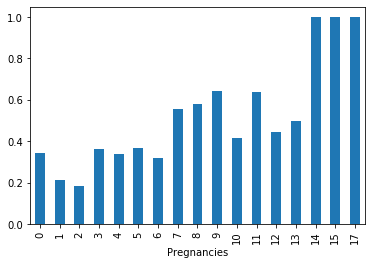

In [30]:
# Conditional density for each feature
# df.groupby('Glucose').Outcome.value_counts()

df.groupby('Pregnancies').Outcome.mean().plot(kind='bar')

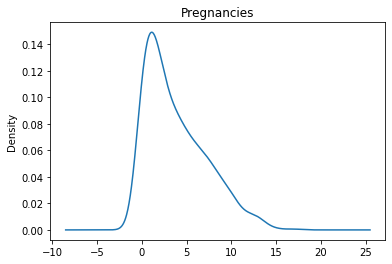

In [88]:
# Visualizing (Kernel Density Estimate) of  Pregnancies
df.Pregnancies.plot.kde( legend=False, title='Pregnancies')

### 3) Which Classifier would be more appropriate?

### 4) Train Naive Bayes and KNN Classifiers on the Training Set

### Naive Bayes

In [89]:
# Naive Bayes disadvantage:
# The assumption of independent features. In practice, it is almost impossible that model will get a set of predictors which are entirely independent.

#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
# X_train = Features for Training = train_features
# y_train = Targets  for training = train_targets

gnb.fit(X_train, y_train)


GaussianNB(priors=None, var_smoothing=1e-09)

### KNN

In [109]:
from sklearn.preprocessing import normalize
from sklearn.preprocessing import scale

#Standardize the train and test features
# X_train = Features for Training = train_features
# X_test  = Features for  Testing = test_features

scaled_train_features = scale(X_train)
scaled_test_features = scale(X_test)

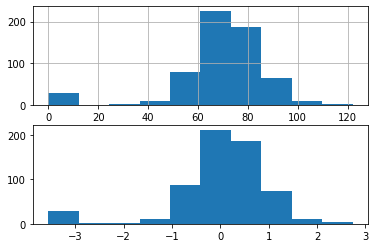

In [110]:
# Visualizing Scaled vs Non-Scaled

f, ax = plt.subplots(nrows=2, ncols=1)
train_features.iloc[:, 2].hist(ax=ax[0])
ax[1].hist(scaled_train_features[:, 2])
plt.show()

In [111]:
# Checking the shapes of 
# X_train = Features for Training = train_features
# scaled_train_features = scale(X_train)
# y_train = Targets  for training = train_targets


print(scaled_train_features.shape)
print(y_train.shape)

(614, 8)
(614,)


In [112]:
from sklearn.neighbors import KNeighborsRegressor

for n in range(2,12):
    # Create and fit the KNN model
    knn = KNeighborsRegressor(n_neighbors = n)
    
    # Fit the model to the training data
    # scaled_train_features = scale(X_train)
    # y_train = Targets  for training = train_targets
    knn.fit(scaled_train_features, y_train)
    
    # Print number of neighbors and the score to find the best value of n
    print("n_neighbors =", n)
    
    # scaled_train_features = scale(X_train) vs train_targets (y_train)
    # scaled_test_features  = scale(X_test)  vs test_targets (y_test)
    
    print('train R^2 score = ', round(knn.score(scaled_train_features, y_train),4))
    print('test  R^2 score = ', round(knn.score(scaled_test_features, y_test),4))

    

n_neighbors = 2
train R^2 score =  0.6857
test  R^2 score =  -0.1614
n_neighbors = 3
train R^2 score =  0.5754
test  R^2 score =  0.0548
n_neighbors = 4
train R^2 score =  0.5188
test  R^2 score =  0.0927
n_neighbors = 5
train R^2 score =  0.4729
test  R^2 score =  0.1278
n_neighbors = 6
train R^2 score =  0.4622
test  R^2 score =  0.133
n_neighbors = 7
train R^2 score =  0.4231
test  R^2 score =  0.1408
n_neighbors = 8
train R^2 score =  0.4026
test  R^2 score =  0.1734
n_neighbors = 9
train R^2 score =  0.3837
test  R^2 score =  0.1989
n_neighbors = 10
train R^2 score =  0.3683
test  R^2 score =  0.2175
n_neighbors = 11
train R^2 score =  0.3673
test  R^2 score =  0.2177


### 5) Testing the Classifiers

### Naive Bayes

In [132]:
#Predict the response for test dataset
y_pred = gnb.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred))

# True negative is (0,0) = 84

# False positive is (0,1) = 18

# True postive is (1,1) = 33

# False negative is (1,0) = 16

pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))


Accuracy: 0.7792207792207793
Confusion Matrix: 
 [[84 18]
 [16 36]]
              precision    recall  f1-score   support

           0       0.84      0.82      0.83       102
           1       0.67      0.69      0.68        52

    accuracy                           0.78       154
   macro avg       0.75      0.76      0.76       154
weighted avg       0.78      0.78      0.78       154



### KNN

In [137]:

# Create the model with the best-performing n_neighbors of 5
knn = KNeighborsRegressor(n_neighbors=7)

# Fit the model
# scaled_train_features = scale(X_train)
# y_train = Targets  for training = train_targets
knn.fit(scaled_train_features, y_train)

# Get predictions for train and test sets
# train_predictions = knn.predict(scaled_train_features)
# scaled_train_features = scale(X_train)
# scaled_test_features = scale(X_test)
# X_train = Features for Training = train_features
# X_test  = Features for  Testing = test_features
# y_train = Targets  for training = train_targets
# y_test  = Targets  for  testing = test_targets

y_pred_knn = knn.predict(scaled_test_features)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_knn.round()))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_knn.round()))

# True negative is (0,0) = 81

# False positive is (0,1) = 21

# True postive is (1,1) = 23

# False negative is (1,0) = 29

pd.crosstab(y_test, y_pred_knn.round(), rownames=['True'], colnames=['Predicted'], margins=True)

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_knn.round()))


Accuracy: 0.7142857142857143
Confusion Matrix: 
 [[81 21]
 [23 29]]
              precision    recall  f1-score   support

           0       0.78      0.79      0.79       102
           1       0.58      0.56      0.57        52

    accuracy                           0.71       154
   macro avg       0.68      0.68      0.68       154
weighted avg       0.71      0.71      0.71       154



### 6) Compare the results

a) Does it confirm your reasoning?



b) Why?

